# Кластеризация. Домашнее задание

### Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
### Обязательное задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* приложить ноутбук

### Дополнительные задания
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [37]:
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (12, 9)

In [41]:
from openpyxl import load_workbook

In [42]:
wb = load_workbook('geo.xlsx')

In [43]:
print(wb.get_sheet_names())

['Sheet1']


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  """Entry point for launching an IPython kernel.


In [44]:
sheet = wb.get_sheet_by_name('Sheet1')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated function get_sheet_by_name (Use wb[sheetname]).
  """Entry point for launching an IPython kernel.


In [45]:
sheet.max_row

108807

In [48]:
sheet.max_column

4

In [49]:
df = pd.DataFrame(sheet.values)
data = sheet.values
cols = next(data)[0:]

In [50]:
from openpyxl.utils.dataframe import dataframe_to_rows
ws = wb.active

In [51]:
df = pd.DataFrame(ws.values, columns=cols)

In [53]:
df = df.drop([0], axis=0)

In [54]:
df

,None,x,y,comment_class
1,0.0,37.6124,55.7775,-1
2,1.0,37.6124,55.7775,-1
3,2.0,37.6033,55.7421,-1
4,3.0,37.5585,55.7288,-1
5,4.0,37.5664,55.7318,-1
6,5.0,37.5585,55.7288,-1
7,6.0,37.5664,55.7318,-1
8,7.0,37.559,55.7234,-1
9,8.0,37.559,55.7234,-1
10,9.0,37.5658,55.7346,-1


In [96]:
X = df.drop('comment_class', axis=1)


In [60]:
X

,None,x,y
1,0.0,37.6124,55.7775
2,1.0,37.6124,55.7775
3,2.0,37.6033,55.7421
4,3.0,37.5585,55.7288
5,4.0,37.5664,55.7318
6,5.0,37.5585,55.7288
7,6.0,37.5664,55.7318
8,7.0,37.559,55.7234
9,8.0,37.559,55.7234
10,9.0,37.5658,55.7346


In [97]:
Y = df.comment_class

In [71]:
Y

1         -1
2         -1
3         -1
4         -1
5         -1
6         -1
7         -1
8         -1
9         -1
10        -1
11        -1
12        -1
13        -1
14        -1
15        -1
16        -1
17        -1
18        -1
19        -1
20        -1
21        -1
22        -1
23        -1
24        -1
25        -1
26        -1
27        -1
28        -1
29         1
30        -1
          ..
108777     1
108778     1
108779     1
108780     1
108781     1
108782     1
108783     1
108784     1
108785     1
108786     1
108787     1
108788     1
108789     1
108790     1
108791     1
108792    -1
108793     1
108794     1
108795     1
108796     1
108797     1
108798     1
108799     1
108800     1
108801     1
108802    -1
108803    -1
108804     1
108805    -1
108806    -1
Name: comment_class, Length: 108806, dtype: object

In [72]:
df.rename(columns={'x': 'longitude', 'y': 'latitude'}, inplace=True)

In [73]:
df

,None,longitude,latitude,comment_class
1,0.0,37.6124,55.7775,-1
2,1.0,37.6124,55.7775,-1
3,2.0,37.6033,55.7421,-1
4,3.0,37.5585,55.7288,-1
5,4.0,37.5664,55.7318,-1
6,5.0,37.5585,55.7288,-1
7,6.0,37.5664,55.7318,-1
8,7.0,37.559,55.7234,-1
9,8.0,37.559,55.7234,-1
10,9.0,37.5658,55.7346,-1


In [77]:
comment_class_dummies = pd.get_dummies(df["comment_class"]).head()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 1 to 108806
Data columns (total 4 columns):
None             108806 non-null float64
longitude        108806 non-null object
latitude         108806 non-null object
comment_class    108806 non-null object
dtypes: float64(1), object(3)
memory usage: 4.2+ MB


In [81]:
df['longitude'] = df['longitude'].apply(pd.to_numeric, errors='coerce')

In [83]:
df['latitude'] = df['latitude'].apply(pd.to_numeric, errors='coerce')

In [88]:
df['comment_class'] = df['comment_class'].apply(pd.to_numeric, errors='coerce')

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108806 entries, 1 to 108806
Data columns (total 4 columns):
None             108806 non-null float64
longitude        108806 non-null float64
latitude         108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(3), int64(1)
memory usage: 4.2 MB


TypeError: You must first set_array for mappable

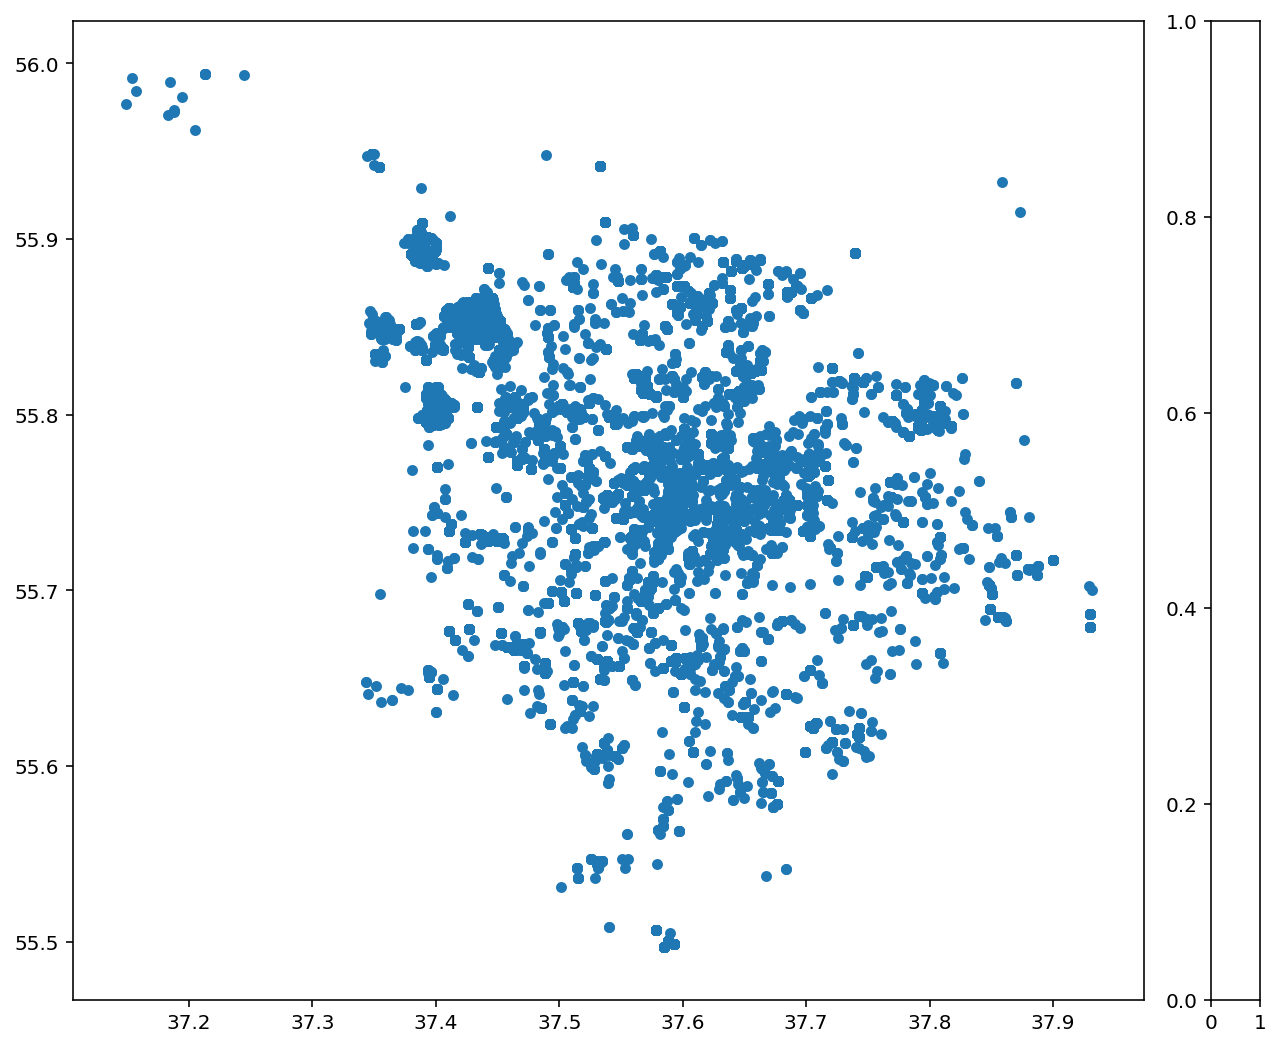

In [90]:
_ = df.plot(kind="scatter", x="longitude", y="latitude")

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


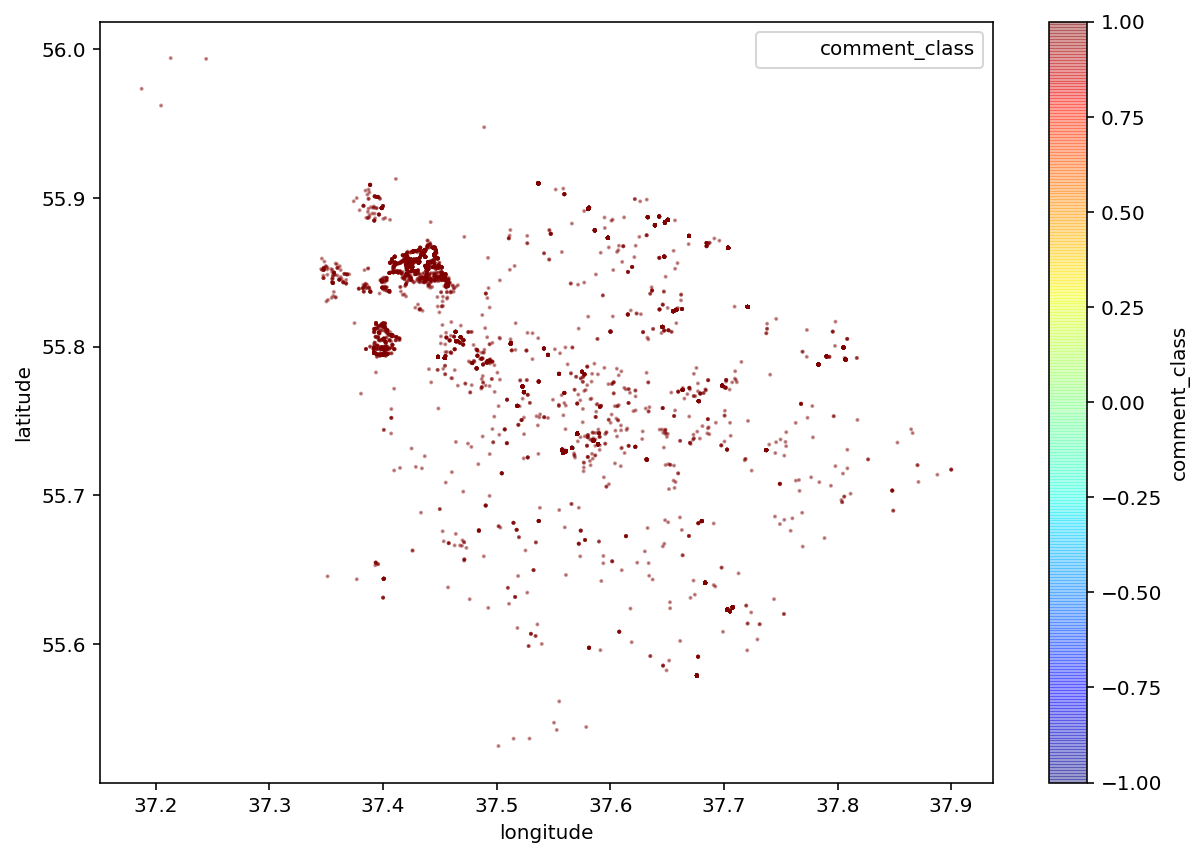

In [91]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["comment_class"], label="comment_class", figsize=(10,7),
    c="comment_class", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
_ = plt.legend()